# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# Using inner join because only need study data on mice. Mice data with no study data and vice versa is useless
mouse_study_data = study_results.merge(mouse_metadata)

# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
len(mouse_study_data['Mouse ID'].unique())

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Mark duplicate rows with .duplicated()
duplicate_rows = mouse_study_data.duplicated(['Mouse ID', 'Timepoint'])
# Get duplicate rows
duplicates = mouse_study_data[duplicate_rows]
# Output all unique Mouse IDs from duplicates
duplicates['Mouse ID'].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
# Output all data where Mouse ID is in the list of duplicates - not just the duplicate rows
# duplicated_mice is boolean series based on whether or not Mouse ID of each row is in list of duplicate Mouse IDs
duplicated_mice = mouse_study_data['Mouse ID'].isin(duplicates['Mouse ID'].unique())
# so use duplicated_mice series (boolean mask) to retrieve data
mouse_study_data[duplicated_mice]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# negate boolean values in duplicated_mice to get not duplicated_mice
clean_study_data = mouse_study_data[~duplicated_mice]
clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data['Mouse ID'].unique())


248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_summary = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
# Assemble the resulting series into a single summary DataFrame.
agg_tumor_by_drug = pd.DataFrame({
    'Mean Tumor Volume' : tumor_summary.mean(),
    'Median Tumor Volume' : tumor_summary.median(),
    'Tumor Volume Variance' : tumor_summary.var(),
    'Tumor Volume Std. Dev.' : tumor_summary.std(),
    'Tumor Volume Std. Err.' : tumor_summary.sem()
})
agg_tumor_by_drug

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_tumor_by_drug_2 = tumor_summary.agg(['mean', 'median', 'var', 'std', 'sem']) 
agg_tumor_by_drug_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

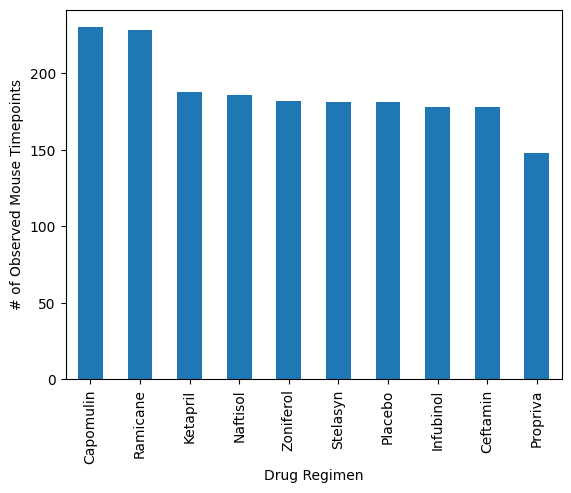

In [104]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_study_data['Drug Regimen'].value_counts()
# ; added to silence output
drug_counts.plot(kind='bar',ylabel='# of Observed Mouse Timepoints');

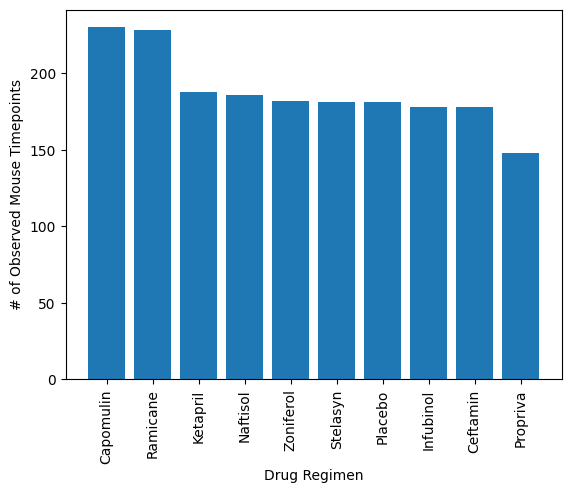

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# drug_counts.index returns distinct drug regimens in the same order as drug_counts itself
plt.bar(drug_counts.index, drug_counts)
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
# ; added to silence output
plt.xticks(rotation=90);

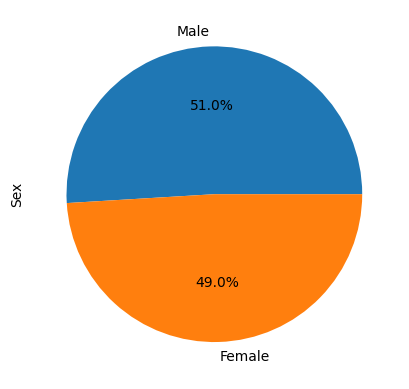

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_study_data['Sex'].value_counts()
sex_plot = sex_counts.plot(kind='pie', ylabel='Sex', autopct='%.1f%%')

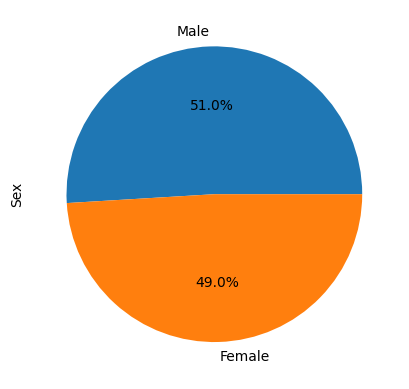

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts,labels=['Male','Female'],autopct='%.1f%%')
# ; added to silence output
plt.ylabel('Sex');

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
specific_drugs = clean_study_data[clean_study_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = specific_drugs.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
largest_tumors = clean_study_data.merge(greatest_timepoint, on=['Mouse ID', 'Timepoint'])
largest_tumors = largest_tumors.rename(columns={'Tumor Volume (mm3)':'Final Tumor Volume (mm3)'})
largest_tumors[['Mouse ID', 'Drug Regimen', 'Timepoint','Final Tumor Volume (mm3)']]

,Mouse ID,Drug Regimen,Timepoint,Final Tumor Volume (mm3)
0,u153,Ceftamin,0,45.000000
1,b447,Ceftamin,0,45.000000
2,x226,Ceftamin,0,45.000000
3,t573,Ceftamin,0,45.000000
4,c326,Infubinol,5,36.321346
...,...,...,...,...
95,a644,Ramicane,45,32.978522
96,i177,Ramicane,45,33.562402
97,r944,Capomulin,45,41.581521
98,u364,Capomulin,45,31.023923


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_cols = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # create treatment_data var for all rows under current treatment
    current_treatment = largest_tumors['Drug Regimen'] == treatment
    treatment_data = largest_tumors[current_treatment]
    # create quartiles and standard quartile calculations based on current treatment's final tumor volumes 
    quartiles = treatment_data['Final Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    largest_tumors_for_treatment = largest_tumors.loc[current_treatment, 'Final Tumor Volume (mm3)']
    # add subset. each Series item in final_tumor_cols corresponds to the same index in treatments
    final_tumor_cols.append(largest_tumors_for_treatment)
    # Determine outliers using upper and lower bounds
    # outliers are values that are either below lower_bound or above upper_bound
    outliers = [val for val in largest_tumors_for_treatment if (val > upper_bound) or (val < lower_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


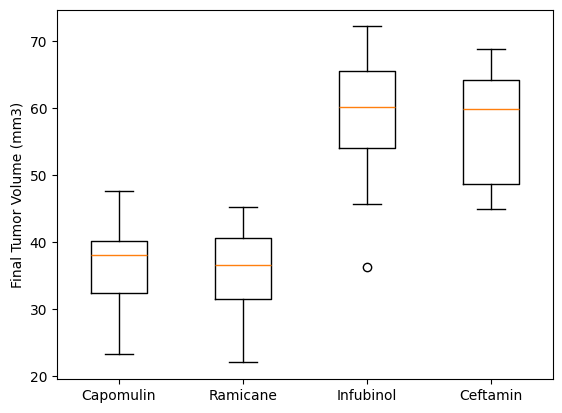

In [18]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(final_tumor_cols)
ax1.set_xticks(range(1, len(treatments)+1), treatments)
print(treatments)

## Line and Scatter Plots

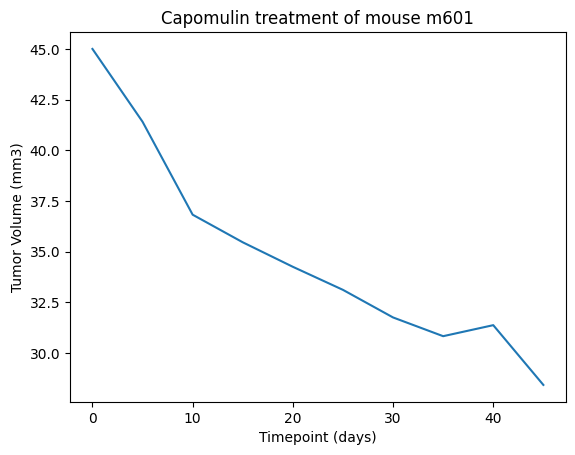

In [103]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# get random mouse from dataframe.
# [capomulin_mice]=boolean mask of all mice under 'Capomulin' regimen, 
capomulin_mice = clean_study_data['Drug Regimen'] == 'Capomulin'
# .sample() returns DataFrame, ['Mouse ID'] selects the 'Mouse ID' Series, .iloc[0] selects the first cell
random_mouse = clean_study_data[capomulin_mice].sample()['Mouse ID'].iloc[0]
mouse_data = clean_study_data[clean_study_data['Mouse ID'] == random_mouse]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"{mouse_data['Drug Regimen'].iloc[0]} treatment of mouse {random_mouse}");

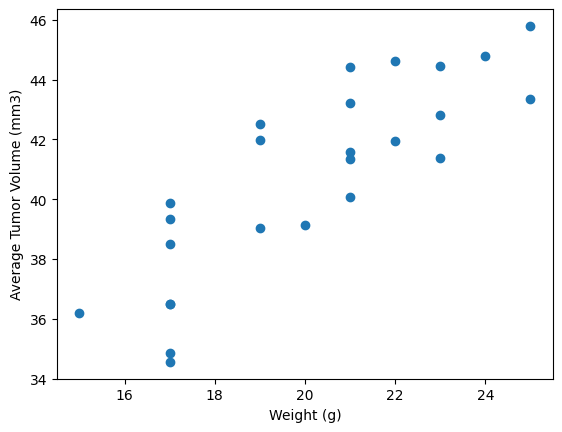

In [92]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_study_data[capomulin_mice ]
# group average tumor volume by mouse
average_tumor_sizes = capomulin_data.groupby('Mouse ID')[['Tumor Volume (mm3)', 'Weight (g)']].mean()
x_values = average_tumor_sizes['Weight (g)']
y_values = average_tumor_sizes['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


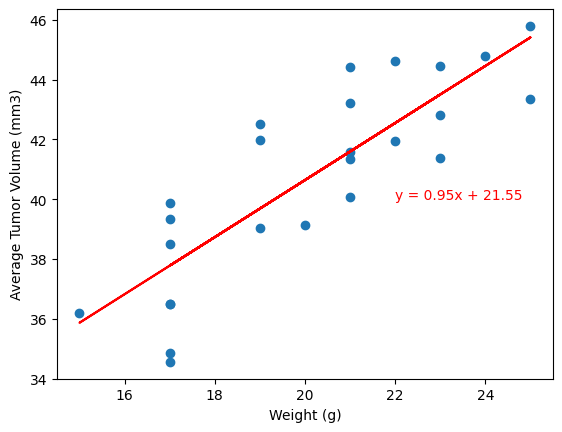

In [102]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# linear regression code using Weight as x_values and Average Tumor Volume as y_values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(22,40),fontsize=10,color="red");
# calculate correlation
correlation = st.pearsonr(x_values, y_values)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')